In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Canada.xlsx', sheet_name = "Canada by Citizenship", skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [3]:
df.rename(columns={ 'OdName' : 'Country', 'AreaName' : 'Continent'}, inplace=True)
df.drop(columns=['Type', 'Coverage', 'AREA', 'REG', 'DEV'], inplace=True)

In [4]:
years =list(range(1980,2014))

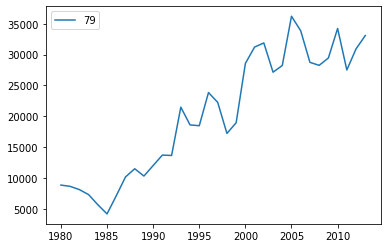

In [5]:
india_data = df[df['Country'] == 'India'][years].T
india_data.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

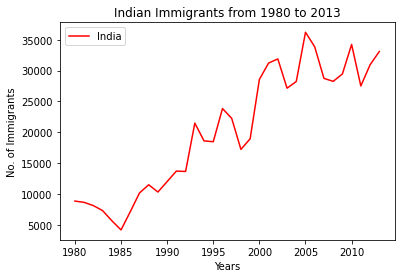

In [6]:
india_data = df[df['Country'] == 'India'][years].T
india_data.plot(kind='line', color=[ 'red', 'blue' ])
plt.title("Indian Immigrants from 1980 to 2013")
plt.xlabel("Years")
plt.ylabel("No. of Immigrants")
plt.legend(['India'])
plt.show

In [7]:
plt.plot?


Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

In [8]:
df.set_index('Country', inplace=True)

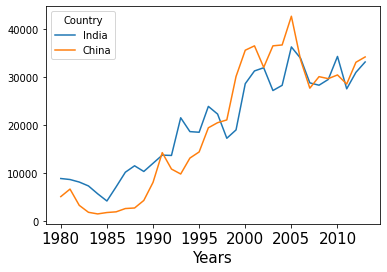

In [9]:
ind_ch = df.loc[['India', 'China'], years].T
ind_ch.plot(kind='line')
plt.xlabel('Years', size= 15)
plt.xticks(size = 15)
plt.show()

Bar Chart


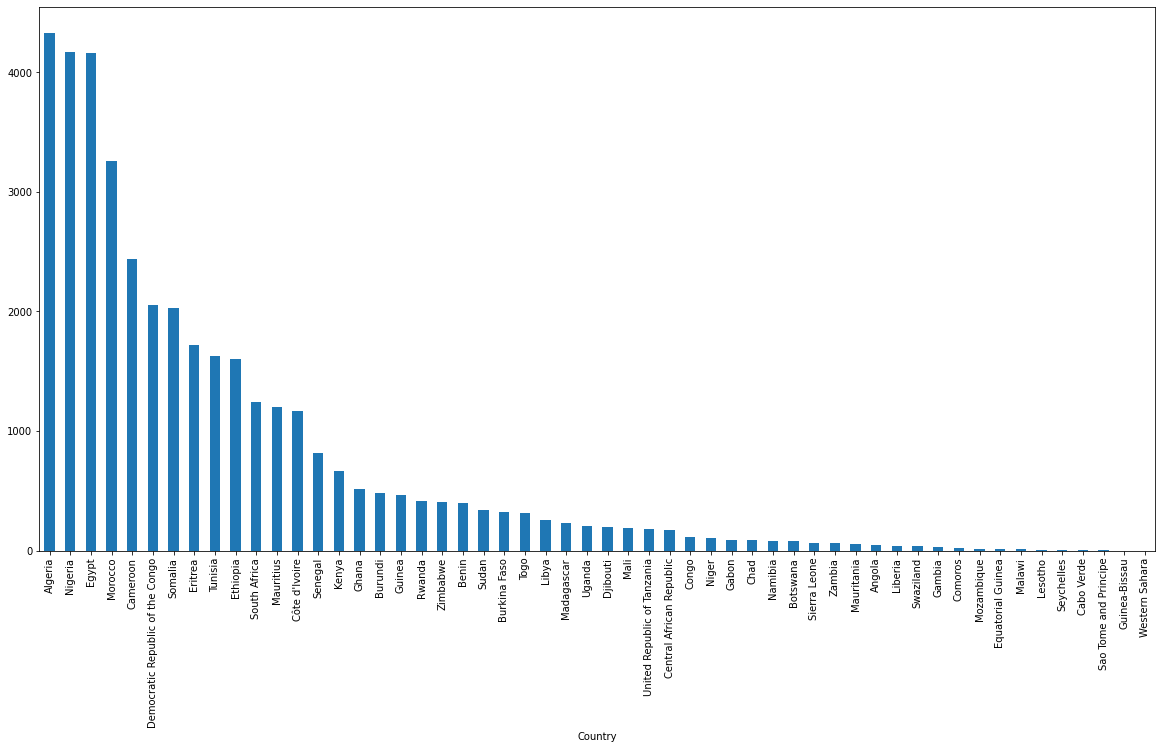

In [10]:
africa_top10 = df[df['Continent'] == 'Africa'].sort_values(2013, ascending = False)[2013]
africa_top10.plot(kind='bar', figsize=(20, 10))
plt.show()

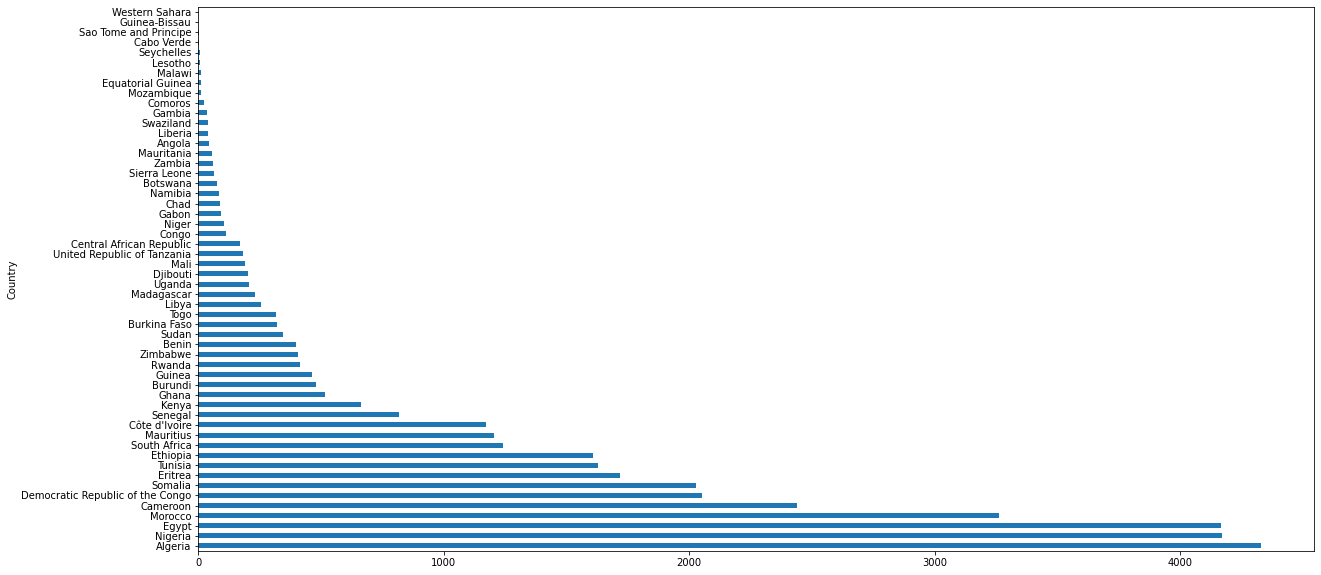

In [11]:

africa_top10 = df[df['Continent'] == 'Africa'].sort_values(2013, ascending = False)[2013]
africa_top10.plot(kind='barh', figsize=(20, 10))
plt.show()

In [12]:
df.sum(axis=1)

C:\Users\Gupta\AppData\Local\Temp/ipykernel_23392/1459321664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [13]:
df.head()

,Continent,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [14]:
df['Total'] = df.sum(axis=1)

C:\Users\Gupta\AppData\Local\Temp/ipykernel_23392/2759960331.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


In [15]:
continents = df.groupby('Continent').sum()['Total']
continents

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

In [16]:
continent.plot(kind="pie", figsize=(7, 7), autopct = "%1.1f%%", label = None)
plt.legend(continents.index, loc="upper left")
plt.axis('equal')

plt.show()

NameError: name 'continent' is not defined

In [ ]:
df[['Continent', 1980]]

,Continent,1980
Country,,
Afghanistan,Asia,16
Albania,Europe,1
Algeria,Africa,80
American Samoa,Oceania,0
Andorra,Europe,0
...,...,...
Viet Nam,Asia,1191
Western Sahara,Africa,0
Yemen,Asia,1


## Visualizing with Plotly


In [ ]:
import plotly.express as px
import seaborn as sns

ModuleNotFoundError: No module named 'plotly'

In [ ]:
penguins = sns.load_dataset('penguins')

NameError: name 'sns' is not defined

In [ ]:
penguins.groupby('species', as_index=False).count()

NameError: name 'penguins' is not defined

In [ ]:
px.bar(data_frame=penguins.groupby('species', as_index=False).count(), x = 'species', y = 'island')

NameError: name 'px' is not defined

Scatter Plot

In [ ]:
penguins

NameError: name 'penguins' is not defined